In [31]:
library("partitions")

In [26]:
RateMatandStateSpace <- function(n, alpha) {
    dim <- P(n)
    Rmatrix <- matrix(ncol=n, nrow=dim)
    x <- parts(n)
    for (i in 1:dim) {
        y <- x[,dim-i+1]
        for (j in 1:n) {
            Rmatrix[i,j] <- length(which(y==j))
        }
    }
    Rmatrix <- Rmatrix[order(Rmatrix[,1], decreasing=TRUE),]
    Rate <- matrix(0, ncol=dim, nrow=dim)
    for (i in 2:dim) {
        for (j in 1:(i-1)) {
            c = Rmatrix[i,] - Rmatrix[j,]
            sum1 <- c%*%rep(1:n)
            check1 <- sum1[1,1]
            w1 <- ifelse(c>0,1,0)
            sum2 <- c%*% w1
            check2 <- sum2[1,1]
            w2 <- ifelse(c<0,1,0)
            cneg <- -c*w2
            if(check1 == 0 & check2 == 1) {
                provrate <- beta(sum(cneg) - alpha, sum(Rmatrix[j,]) - sum(cneg) + alpha) / beta(alpha, 2-alpha)
                    for (k in 1:n) {
                        provrate <- provrate * choose(Rmatrix[j,k], cneg[k])
                    }
                Rate[j,i] <- provrate }
            
            }
        }
        for (i in 1:dim){
            Rate[i,i] <- -sum(Rate[i,])
        }
        return(list(RateMat=Rate, StateSpace=Rmatrix))
    
}

In [11]:
SiteFrequencySpectrumBetaCoalescent <- function(n, alpha, mut.rt) {
    dim <- P(n)
    
    RmSs <- RateMatandStateSpace(n, alpha)
    Rmat <- RmSs$StateSpace[1:(dim-1), 1:(n-1)]
    T <- RmSs$RateMat[1:(dim-1), 1:(dim-1)]
    invRate <- solve(-T)
    m1 <- rep(0, (n-1))
    id <- diag(1, (dim-1))
    
    for (i in 1:(n-1)) { 
        m1[i] <- id[1,] %*% invRate %*% Rmat[,i]
    }
    
    m1 <- mut.rt / 2 * m1
    
    return(list(Mean=m1))
}

In [25]:
SFS125 <- SiteFrequencySpectrumBetaCoalescent(50, 1.99999, 0.01)

ERROR: Error: cannot allocate vector of size 310,8 Gb


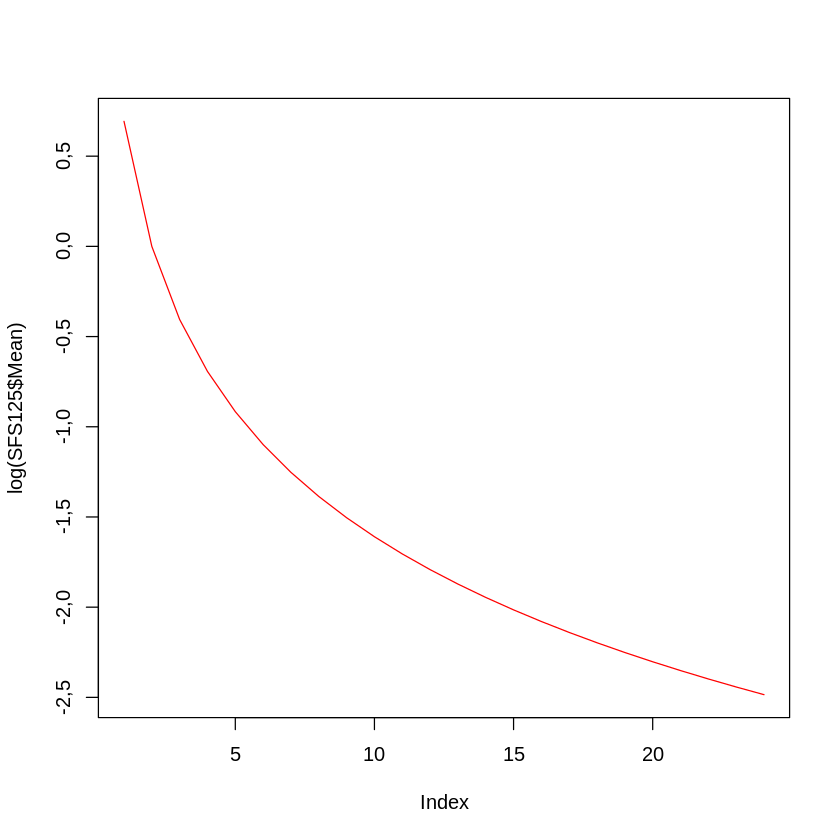

In [24]:
plot(log(SFS125$Mean),type="l", col="red")

In [87]:
SiteFrequencySpectrumBetaCoalescent <- function(n, alpha, mut.rt) {
    dim <- P(n)
    
    RmSs <- RateMatandStateSpace(n, alpha)
    Rmat <- RmSs$StateSpace[1:(dim-1), 1:(n-1)]
    T <- RmSs$RateMat[1:(dim-1), 1:(dim-1)]
    invRate <- solve(-T)
    m1 <- rep(0, (n-1))
    id <- diag(1, (dim-1))
    
    for (i in 1:(n-1)) { 
        m1[i] <- id[1,] %*% invRate %*% Rmat[,i]
    }
    
    m1 <- mut.rt / 2 * m1
    
    return(list(Mean=m1))
}

In [102]:
n <- 25
alpha <- 1.25
mutation_rate <- 2

SiteFrequencySpectrumBetaCoalescent(n, alpha, mutation_rate)

$Mean
 [1] 5,78588563 1,23581474 0,64526709 0,42478464 0,31327774 0,24740010
 [7] 0,20460668 0,17499721 0,15359321 0,13764264 0,12551635 0,11620140
[13] 0,10904813 0,10363621 0,09970199 0,09710089 0,09579389 0,09585666
[19] 0,09752024 0,10127276 0,10810987 0,12023023 0,14347237 0,20056545